In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


### Step 1: Load and sanity check the data

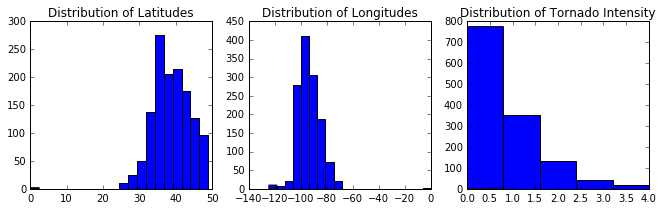

In [9]:
import mpl_toolkits
import mpl_toolkits.basemap

with open('torn.csv', 'r') as torntxt:
    lines = torntxt.readlines()


# extract lists of latitudes, longitudes, and scales
tornTuple = [line.split(',') for line in lines]

lats = [float(tp[15]) for tp in tornTuple]
lons = [float(tp[16]) for tp in tornTuple]
scales = [int(tp[10]) for tp in tornTuple]

# quickly sanity-check the data to make sure it is sensible

figsize(15,3)

subplot(141)
title('Distribution of Latitudes')
hist(lats, bins=20)

subplot(142)
title("Distribution of Longitudes");
hist(lons, bins=20);

subplot(143)
title("Distribution of Tornado Intensity");
hist(scales, bins=5);

### Step 2: Plot a blank map

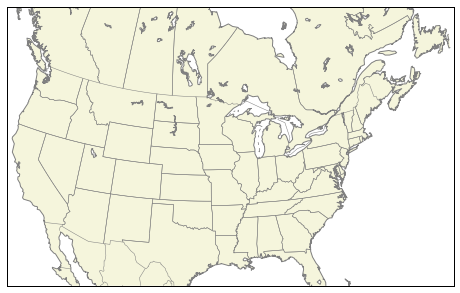

In [79]:
# specify the map boundaries and projection type
map_func = mpl_toolkits.basemap.Basemap(llcrnrlon= -120,
                                        llcrnrlat=25,
                                        urcrnrlon=-50,
                                        urcrnrlat=50,
                                        projection="tmerc",
                                        lon_0 = -95,
                                        lat_0 = 35,
                                        resolution = "l")

figsize(8, 8)

#
# draw some features of the map (for more fill options refer to the Basemap Resources in the HW4 spec).
#
map_func.drawcoastlines(color = "gray")
map_func.drawcountries(color = "gray")
map_func.drawstates(color = "gray")
map_func.fillcontinents(color = "beige")
map_func.drawmapboundary();

### Step 3: Plot the position of each tornado

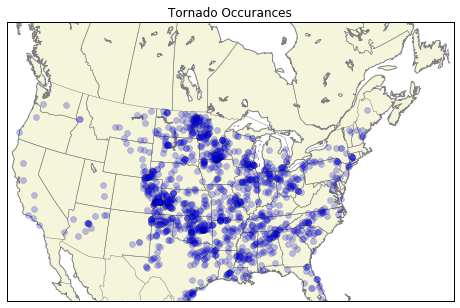

In [97]:
map_func = mpl_toolkits.basemap.Basemap(llcrnrlon= -120,
                                        llcrnrlat=25,
                                        urcrnrlon=-50,
                                        urcrnrlat=50,
                                        projection="tmerc",
                                        lon_0 = -95,
                                        lat_0 = 35,
                                        resolution = "l")
figsize(8, 8)
#
# plot in a single color with slight transparency
#
title("Tornado Occurances")

map_func.drawcoastlines(color = "gray")
map_func.drawcountries(color = "gray")
map_func.drawstates(color = "gray")
map_func.fillcontinents(color = "beige")
map_func.drawmapboundary();
map_func.plot(lons, lats, 'o', color="blue", alpha=0.25, latlon=True)

### Step 4: Plot the position and intensity of each tornado with various data encoding strategies

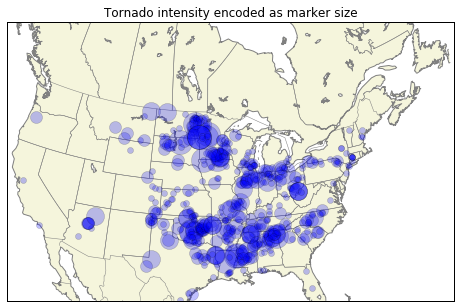

In [100]:
map_func = mpl_toolkits.basemap.Basemap(llcrnrlon= -120,
                                        llcrnrlat=25,
                                        urcrnrlon=-50,
                                        urcrnrlat=50,
                                        projection="tmerc",
                                        lon_0 = -95,
                                        lat_0 = 35,
                                        resolution = "l")

# decide how to color each point
color_map = matplotlib.cm.get_cmap('Blues')
norm_scales = [float(scale) / 5 for scale in scales]
my_colors = [color_map(1-norm_scale) for norm_scale in norm_scales]
my_sizes = [norm_scale*30 for norm_scale in norm_scales]


figsize(8, 8)

title("Tornado intensity encoded as marker size")

map_func.drawcoastlines(color = "gray")
map_func.drawcountries(color = "gray")
map_func.drawstates(color = "gray")
map_func.fillcontinents(color = "beige")
map_func.drawmapboundary();
for i in range(len(tornTuple)):
    map_func.plot(lons[i], lats[i], 'o', color="blue", alpha=0.25, markersize=my_sizes[i], latlon=True)

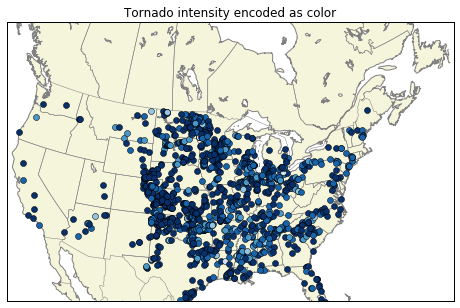

In [67]:
map_func = mpl_toolkits.basemap.Basemap(llcrnrlon= -120,
                                        llcrnrlat=25,
                                        urcrnrlon=-50,
                                        urcrnrlat=50,
                                        projection="tmerc",
                                        lon_0 = -95,
                                        lat_0 = 35,
                                        resolution = "l")
figsize(8, 8)
title("Tornado intensity encoded as color")

map_func.drawcoastlines(color = "gray")
map_func.drawcountries(color = "gray")
map_func.drawstates(color = "gray")
map_func.fillcontinents(color = "beige")
map_func.drawmapboundary();

for i in range(len(tornTuple)):
    map_func.plot(lons[i], lats[i], 'o', c=my_colors[i], latlon=True)

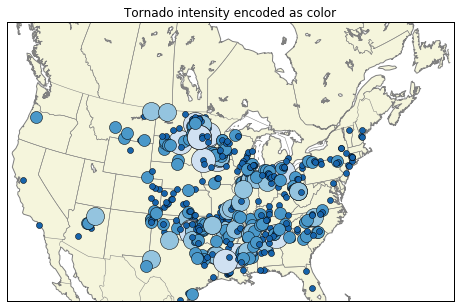

In [70]:
map_func = mpl_toolkits.basemap.Basemap(llcrnrlon= -120,
                                        llcrnrlat=25,
                                        urcrnrlon=-50,
                                        urcrnrlat=50,
                                        projection="tmerc",
                                        lon_0 = -95,
                                        lat_0 = 35,
                                        resolution = "l")
figsize(8, 8)
title("Tornado intensity encoded as color")

map_func.drawcoastlines(color = "gray")
map_func.drawcountries(color = "gray")
map_func.drawstates(color = "gray")
map_func.fillcontinents(color = "beige")
map_func.drawmapboundary();
for i in range(len(tornTuple)):
    map_func.plot(lons[i], lats[i], 'o', markersize=my_sizes[i], c=my_colors[i], latlon=True)

## Step 5: Plot a heatmap of tornado prevalence

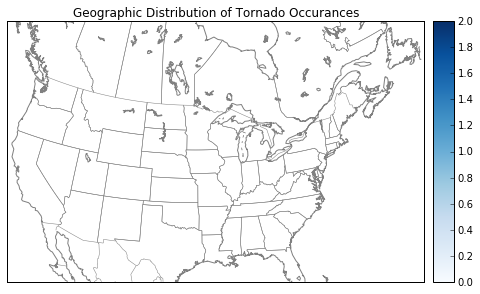

In [105]:
# x, y = np.array(lons), np.array(lats)
# x, y =  lats,lons
minx, miny              = map_func(-120, 25)
maxx, maxy              = map_func(-50, 50)
heatmap, xedges, yedges = np.histogram2d(lats, lons, bins=30, range = [[miny, maxy], [minx, maxx]])
extent                  = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

map_func = mpl_toolkits.basemap.Basemap(llcrnrlon= -120,
                                        llcrnrlat=25,
                                        urcrnrlon=-50,
                                        urcrnrlat=50,
                                        projection="tmerc",
                                        lon_0 = -95,
                                        lat_0 = 35,
                                        resolution = "l")
figsize(8, 8)
title("Geographic Distribution of Tornado Occurances")

map_func.drawcoastlines(color = "gray")
map_func.drawcountries(color = "gray")
map_func.drawstates(color = "gray")
map_func.drawmapboundary()
map_func.imshow(heatmap, extent=extent, cmap="Blues", interpolation="nearest");
map_func.colorbar();